In [121]:
import numpy as np
from PIL import Image
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from skimage import io
import fs
import torchvision
from torchvision import transforms
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import multiprocessing

import matplotlib.pyplot as plt
import torch.nn as nn
cuda = torch.cuda.is_available()
import time
device = torch.device("cuda" if cuda else "cpu")

In [122]:
from apex import amp
num_of_class=205
import random

In [ ]:
'''import torch.nn.functional as F
from torch.autograd import Variable

def one_hot(index, classes):
    size = index.size() + (classes,)
    view = index.size() + (1,)

    mask = torch.Tensor(*size).fill_(0)
    index = index.view(*view)
    ones = 1.

    if isinstance(index, Variable):
        ones = Variable(torch.Tensor(index.size()).fill_(1))
        mask = Variable(mask, volatile=index.volatile)

    return mask.scatter_(1, index, ones)


class FocalLoss(nn.Module):

    def __init__(self, gamma=0, eps=1e-7):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.eps = eps

    def forward(self, input, target):
        y = one_hot(target, input.size(-1))
        logit = F.softmax(input, dim=-1)
        logit = logit.clamp(self.eps, 1. - self.eps)

        loss = -1 * y * torch.log(logit) # cross entropy
        loss = loss * (1 - logit) ** self.gamma # focal loss

        return loss.sum()
'''

In [ ]:
#检查是否所有图片都有三个色道
'''
test_path='C:/Users/zhaoh/Downloads/test image/'
for f in fs.open_fs(test_path).walk.files(filter=["*.bmp","*.jpg"]):
    name=os.path.join(test_path+str(f))
    print(name)
    a=io.imread(name)
    plt.imshow(a)
    if a.shape[2] != 3:
        print(name,'danger')
'''

In [88]:
#车型字典：品牌名称，文件名过滤关键字，训练集编号（***如果默认训练集编号直接使用enumerate的index）
#最后一个数字用于未来可能增加的一个额外的loss，这个loss惩罚混淆不同品牌（比如把奥迪A4认成A6不会被惩罚）
dictionary={'奥迪A4L':["奥迪A4L",0 ],
            '奥迪Q7':["奥迪Q7",1],
            
            '奔驰C级2008':['奔驰C级2008',3],
            '奔驰C级2011':['奔驰C级2011',3],
            '奔驰E级':['奔驰E级',3],
            '奔驰GLK':['奔驰GLK',3],
            '奔驰ML':['奔驰ML',3],
            '奔驰R':['奔驰R',3],
            '奔驰ML':['奔驰ML',3],
            '奔驰S级':['奔驰S级',3],
            '宝马3系 2009':["宝马3系2009",7],
            '宝马5系 2011':["宝马5系2011",7],
            '宝马5系 2014':["宝马5系2014",7],
            '宝马5系GT':["宝马5系GT",7],
            '宝马X1':["宝马X1" ,8],
            '宝马X3':["宝马X3" ,8],
            '宝马X5':["宝马X5" ,8],
            '本田思铂睿':["本田思铂睿",10 ],
            '本田CR-V 2007':["本田CR-V 2007",11 ],
            '本田奥德赛2008':["本田奥德赛2008",12],
            '本田奥德赛2015':["本田奥德赛2015",12],
            '别克 君威2009':["别克 君威2009" ,13 ],
            '别克 君威2014':["别克 君威2014" ,13 ],
            '别克 君越2008':["别克 君越2008" ,13 ],
            '别克 君越2009':["别克 君越2009" ,13 ],
            '别克 君越2013':["别克 君越2013" ,13 ],
            '别克 凯越2008':["别克 凯越2008" ,13 ],
            '别克 凯越2013':["别克 凯越2013" ,13 ],
            '别克 英朗2015':["别克 英朗2015" ,13 ],
            '别克 英朗GT':["别克 英朗GT" ,13 ],
            '别克 英朗GX':["别克 英朗GX" ,13 ],
            '别克GL8':["别克GL8" ,13],
            '宝骏630':['宝骏630',18],
            '宝骏730':['宝骏730',18],
            '保时捷 卡宴':["保时捷 卡宴"  ,19],
            '奔腾B50 2009':['奔腾B50 2009',26],
            '奔腾B50 2013':['奔腾B50 2013',26],            
            '北汽幻速S3':["北汽幻速S3" ,28],
            '北汽绅宝D50':["北汽绅宝D50" ,28],
            '北汽威望205':["北汽威望205" ,29],
            '北汽威望306':["北汽威望306" ,29],
            
            '长安CS35':["长安CS35" ,33],
            '长安CS75':["长安CS75" ,33],
            '长安CX20':["长安CX20 2014" ,33],
            '长安CX30':["长安CX30" ,33],
            '长安V5 2011':["长安V5 2011" ,33],
            '长安V5 2013':["长安V5 2013" ,33],
            '长安之星1':["长安之星1" ,34],
            '长安之星2':["长安之星2" ,34],
            '长安之星S460':["长安之星S460" ,34],
            '长安奔奔2007':["长安奔奔2007" ,34],
            '长安奔奔2014':["长安奔奔2014" ,34],
            '长安欧诺':["长安欧诺" ,34],
            '长安金牛星':["长安金牛星" ,34],
            '长安星光4500':["长安星光4500" ,34],
            '长安致尚':["长安致尚" ,34],
            '长安悦翔':["长安悦翔" ,34],
            '长城C30':["长城C30" ,36],
            '长城M4':["长城M4" ,36],
            '长城V80':["长城V80" ,36],

            '大众CC':["大众CC" ,37],
            '大众迈腾2007':["大众迈腾 2007" ,37],
            '大众迈腾2012':["大众迈腾 2012" ,37],
            '大众宝来2012':["大众宝来 2012" ,37],
            '大众宝来2013':["大众宝来 2013" ,37],
            '大众帕萨特2011':["大众帕萨特 2011" ,37],
            '大众帕萨特领驭2005':["大众帕萨特领驭2005" ,37],
            '大众帕萨特领驭2009':["大众帕萨特领驭2009" ,37],
            '大众朗逸2008':["大众朗逸2008" ,37],
            '大众朗逸2013':["大众朗逸2013" ,37],
            '大众桑塔纳2013':["大众桑塔纳2013" ,37],
            '大众桑塔纳志俊':["大众桑塔纳志俊" ,37],
            '大众桑塔纳经典':["大众桑塔纳经典" ,37],
            '大众高尔夫2010':["大众高尔夫2010" ,37],
            '大众高尔夫2014':["大众高尔夫2014" ,37],
            '大众捷达2008':["大众捷达2008" ,37],
            '大众捷达2010':["大众捷达2010" ,37],
            '大众捷达2013':["大众捷达2013" ,37],
            '大众途安':["大众途安" ,37],
            '大众途观2010':["大众途观2010" ,37],
            '大众途观2013':["大众途观2013" ,37],
            '大众速腾2006':["大众速腾2006" ,37],
            '大众速腾2012':["大众速腾2012" ,37],
            '大众辉腾':["大众辉腾" ,37],
            '东风 菱智 M5':["东风 菱智 M5" , 41],
            '东风 菱智 mpv':["东风 菱智 mpv2013" , 41],
            '东风 帅客':["东风 帅客" , 41],
            '东风 锐骐皮卡':["东风 锐骐皮卡" , 43],
            '东风小康 厢式车':["东风小康 厢式车" , 43],
            '东风小康V 厢式车':["东风小康V 厢式车" , 43],
            '道奇酷威':["道奇酷威",44],

            '丰田 卡罗拉2010':["丰田 卡罗拉2010",46],
            '丰田 卡罗拉2014':["丰田 卡罗拉2014",46],
            '丰田 汉兰达2009':["丰田 汉兰达2009",46],
            '丰田 汉兰达2012':["丰田 汉兰达2012",46],
            '丰田 凯美瑞2009':["丰田 凯美瑞2009",46],
            '丰田 凯美瑞2013':["丰田 凯美瑞2013",46],
            '丰田 兰德酷路泽':[ "丰田 兰德酷路泽" ,47],
            '丰田 威驰2014':[ "丰田 威驰2014" ,47],
            '丰田 皇冠2012':[ "丰田 皇冠2012" ,47],
            '丰田 锐志2013':[ "丰田 锐志2013" ,47],
            '丰田RAV4 2013':[ "丰田RAV4 2013" ,47],
            '丰田普拉多':["丰田普拉多",48],
            '福特全顺':["福特全顺" ,53],
            '福特探险者':["福特探险者" ,53],
            '福特锐界':["福特锐界" ,53],
            '福特嘉年华2013':["福特嘉年华2013" ,53],
            '福特福克斯2013':["福特福克斯2013" ,53],
            '福特福克斯2009':["福特福克斯2009" ,53],
            '福特蒙迪欧2013':["福特蒙迪欧2013" ,53],
            '福特蒙迪欧致胜':["福特蒙迪欧致胜" ,53],
            '福特翼虎':["福特翼虎" ,53],

            '广汽传祺GS5':["广汽传祺GS5" ,58],
            
            "哈弗H1":["哈弗H1" ,63],
            "哈弗H3":["哈弗H3" ,63],
            "哈弗H6 2011":["哈弗H6 2011" ,63],
            "哈弗H6 2013":["哈弗H6 2013" ,63],
            
            '吉利GC7':['吉利GC7',68],
            '吉利GX7':['吉利GX7',68],
            '吉利经典帝豪':['吉利经典帝豪',68],
            '吉利远景':['吉利远景',68],
            '吉利金刚':['吉利金刚',68],
            '吉利帝豪EC7':['吉利帝豪EC7',68],
            '吉利帝豪EC8':['吉利帝豪EC8',68],
            '吉利海景':['吉利海景',68],
            '吉利熊猫':['吉利熊猫',68],
            '金杯海狮':['金杯海狮',74],
            
            '凯迪拉克SRX':["凯迪拉克SRX" ,78],


            '路虎揽胜极光':['路虎揽胜极光',0],
            '铃木天语SX4':['铃木天语SX4',0],
            '铃木天语尚悦':['铃木天语尚悦',0],
            '铃木北斗星':['铃木北斗星',0],
            '铃木雨燕':['铃木雨燕',0],
            '铃木奥拓':['铃木奥拓',0],
            '雷诺科雷傲':['雷诺科雷傲',0],

            '马自达3 2010':['马自达3 2010',0],
            '马自达6 阿特兹':['马自达6 阿特兹',0],
            '马自达6 2007':['马自达6 2007',0],
            '马自达CX5':['马自达CX5',0],
            '马自达CX6':['马自达CX6',0],
            '马自达睿翼':['马自达睿翼',0],

            '奇瑞 旗云2':['奇瑞 旗云2',0],
            '奇瑞旗云3':['奇瑞旗云3',0],
            '奇瑞 瑞虎1':['奇瑞 瑞虎1',0],
            '奇瑞 瑞虎5':['奇瑞 瑞虎5',0],
            '奇瑞瑞虎3':['奇瑞瑞虎3',0],
            '奇瑞A3 2008':['奇瑞A3 2008',0],
            '奇瑞E3':['奇瑞E3',0],
            '奇瑞E5':['奇瑞E5',0],
            '奇瑞QQ3':['奇瑞QQ3',0],
            '奇瑞QQ6':['奇瑞QQ6',0],
            '起亚K2':['起亚K2',0],
            '起亚K3':['起亚K3',0],
            '起亚K5':['起亚K5',0],
            '起亚狮跑 2009':['起亚狮跑 2009',0],
            '起亚狮跑 2013':['起亚狮跑 2013',0],
            '起亚智跑 2011':['起亚智跑 2011',0],
            '起亚智跑 2015':['起亚智跑 2015',0],
            '起亚索兰托':['起亚索兰托',0],
            '起亚速迈':['起亚速迈' ,0],
            '起亚福瑞迪2009':['起亚福瑞迪2009',0],
            '起亚福瑞迪2014':['起亚福瑞迪2014',0],
            '起亚赛拉图2010':['起亚赛拉图2010',0],
            '启辰D50':['启辰D50', 0],

            '日产天籁2011':['日产天籁2011',0],
            '日产天籁2013':['日产天籁2013',0],
            '日产轩逸2009':['日产轩逸2009',0],
            '日产阳光':['日产阳光',0],
            '日产奇骏':['日产奇骏',0],
            '日产骊威2008':['日产骊威2008',0],
            '日产骊威2013':['日产骊威2013',0],
            '日产逍客':['日产逍客',0],
            '日产骐达2011':['日产骐达2011',0],
            '荣威350 2010':['荣威350 2010',0],
            '荣威350 2012':['荣威350 2012',0],
            '荣威550':['荣威550',0],
            '荣威750':['荣威750',0],
            
            '斯柯达昊锐':['斯柯达昊锐',0],
            '斯柯达明锐2010':['斯柯达明锐2010',0],
            '斯柯达明锐2015':['斯柯达明锐2015',0],
            '斯柯达昕派':['斯柯达昕派',0],
            '斯柯达速派':['斯柯达速派',0],

            '五菱之光2013':['五菱之光2013',0],
            '五菱宏光2010':['五菱宏光2010',0],
            '五菱宏光S':['五菱宏光S',0],
            '五菱宏光V':['五菱宏光V',0],
            '五菱荣光 小卡':['五菱荣光 小卡',0],

            '现代 格瑞':['现代 格瑞',0],
            '现代 索纳塔 朗动':['现代 索纳塔 朗动',0],
            '现代圣达':['现代圣达',0],
            '现代伊兰特2011':['现代伊兰特2011',0],
            '现代途胜':['现代途胜',0],
            '现代瑞纳':['现代瑞纳',0],
            '雪佛兰乐风':['雪佛兰乐风',0],
            '雪佛兰迈锐宝':['雪佛兰迈锐宝',0],
            '雪佛兰科帕奇':['雪佛兰科帕奇',0],
            '雪佛兰科鲁兹':['雪佛兰科鲁兹',0],
            '雪佛兰爱唯欧':['雪佛兰爱唯欧',0],
            '雪佛兰景程':['雪佛兰景程',0],
            '雪佛兰赛欧':['雪佛兰赛欧',0],
            '雪铁龙C4':['雪铁龙C4',0],
            '雪铁龙C5':['雪铁龙C5',0],
            '雪铁龙世嘉':['雪铁龙世嘉',0],
            '雪铁龙爱丽舍':['雪铁龙爱丽舍',0],

            '众泰5008':['众泰5008',0],
            '众泰t600':['众泰t600',0],
            '众泰z300':['众泰z300',0]
            
           }

In [134]:
label2name={'':""}
for index, item in enumerate(dictionary.items()):
    #print(item[0])
    label2name[index]=item[0]
    #dict([index,item[0]])
#for index, item in (label2name.items()):
    #print(index,item)#测试函数把label翻译为车名的字典
for i in enumerate(dictionary):
    print(i)

(0, '奥迪A4L')
(1, '奥迪Q7')
(2, '奔驰C级2008')
(3, '奔驰C级2011')
(4, '奔驰E级')
(5, '奔驰GLK')
(6, '奔驰ML')
(7, '奔驰R')
(8, '奔驰S级')
(9, '宝马3系 2009')
(10, '宝马5系 2011')
(11, '宝马5系 2014')
(12, '宝马5系GT')
(13, '宝马X1')
(14, '宝马X3')
(15, '宝马X5')
(16, '本田思铂睿')
(17, '本田CR-V 2007')
(18, '本田奥德赛2008')
(19, '本田奥德赛2015')
(20, '别克 君威2009')
(21, '别克 君威2014')
(22, '别克 君越2008')
(23, '别克 君越2009')
(24, '别克 君越2013')
(25, '别克 凯越2008')
(26, '别克 凯越2013')
(27, '别克 英朗2015')
(28, '别克 英朗GT')
(29, '别克 英朗GX')
(30, '别克GL8')
(31, '宝骏630')
(32, '宝骏730')
(33, '保时捷 卡宴')
(34, '奔腾B50 2009')
(35, '奔腾B50 2013')
(36, '北汽幻速S3')
(37, '北汽绅宝D50')
(38, '北汽威望205')
(39, '北汽威望306')
(40, '长安CS35')
(41, '长安CS75')
(42, '长安CX20')
(43, '长安CX30')
(44, '长安V5 2011')
(45, '长安V5 2013')
(46, '长安之星1')
(47, '长安之星2')
(48, '长安之星S460')
(49, '长安奔奔2007')
(50, '长安奔奔2014')
(51, '长安欧诺')
(52, '长安金牛星')
(53, '长安星光4500')
(54, '长安致尚')
(55, '长安悦翔')
(56, '长城C30')
(57, '长城M4')
(58, '长城V80')
(59, '大众CC')
(60, '大众迈腾2007')
(61, '大众迈腾2012')
(62, '大众宝来2012')
(63, '大众宝来2013')
(64, 

In [124]:
class DrivingDataset(Dataset):
    def __init__(self,data_dir, input_w=224, input_h=224,is_train=True,transform=None):
        """{0:"other",1:"drink",2:"phone",3:"smoke"}"""
        self.data_filenames = []
        self.data_ids = []

        self.is_train=is_train

        self.data_root=fs.open_fs(data_dir)
        self.transform = transform
        index=0
        
        #countlist = [[0,''] for i in range(num_of_class)]#number of class
        namelist = [[] for i in range(num_of_class)]#store filename
        #count the number in each category
        k=0
        for p in self.data_root.walk.files(filter=["*.jpg","*.bmp"]):
            filename=data_dir+p
#########################################a            
            for index,item in enumerate(dictionary.items()):
                for i in range (len(item[1])-1):
                    if item[1][i] in filename:#i每个车型
                        #namelist[index].append(filename)
                        if is_train==False and k%20==0:
                            namelist[index].append(filename)

                        elif is_train==True and k%20!=0:
                            namelist[index].append(filename)

                        k+=1

        for i in range(num_of_class):
            if len(namelist[i])>1050:
                namelist[i]=random.sample(namelist[i], 1050)
            for j in range(len(namelist[i])):#单个文件名
                self.data_ids.append(i)
                self.data_filenames.append(namelist[i][j])
                            
        for i in range(num_of_class):                    
            print(label2name[i],len(namelist[i]))#打印每个车型有多少照片


    def __getitem__(self, item):
        """Grey(i, j) = 0.299 × R(i, j) + 0.587 × G(i, j) + 0.114 × B(i, j)"""
        
            
        img_path = self.data_filenames[item]
        target = self.data_ids[item]

        image = io.imread(img_path)#发现cv2不支持路径中有中文，换成io.imread
        if self.transform:
                image = self.transform(image)

        target = np.array([target], dtype=np.long)#########################
        target = torch.from_numpy(target)


        return image,target
    
    def __len__(self):

            return len(self.data_filenames)


In [125]:
#新的transform，通过padding保证不畸变图片,ratio是需要设置的最终图片长宽比
class ratio_crop(object):
    def __init__(self, ratio=1.05):
        self.ratio = ratio
    def __call__(self, images):
            ratio=1.05
            #for img in images:
            w=images.shape[1]
            h=images.shape[0]
            aspect_ratio=float(w)/float(h)
            #print(images.shape,aspect_ratio)
            if aspect_ratio>ratio:
                dif = np.abs(w  - h)
                pad1, pad2 = int(dif // 2), int(dif - dif // 2)
                pad = ((pad1, pad2), (0, 0), (0, 0))
                images = np.pad(images, pad, "constant", constant_values=0)
                #input_img = cv2.resize(input_x, (inputwidth, inputheight))
            else:
                # padding w
                dif = np.abs(h  - w)
                pad1, pad2 = int(dif // 2), int(dif - dif // 2)
                pad = ((0, 0), (pad1, pad2), (0, 0))
                images = np.pad(images, pad, "constant", constant_values=0)
                #input_img = cv2.resize(input_x, (inputwidth, inputheight))
            return images
        
transform = transforms.Compose([
            ratio_crop(1.05),
            transforms.ToPILImage(),
            transforms.Resize((224,224), interpolation=2),  
            transforms.RandomHorizontalFlip(0.2), 
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
]) 


In [ ]:
'''
#count the number of training images##################################only for test

#test_path = 'C:/Users/zhaoh/Downloads/car recognition/data/honda/sedan/'
test_path='C:/Users/zhaoh/Downloads/car images/'
i=0
#carlabel=[[0 for x in range(10000)] for x in range(2)] 
#print(carlabel)
data_root=fs.open_fs(test_path)
for p in data_root.walk.files(filter=["*.jpg"]):
    i=i+1

print(i)
##############################################
'''

In [128]:
train_set = DrivingDataset(data_dir="C:/Users/zhaoh/Downloads/car images/", is_train=True,transform=transform) 

#val_set = DrivingDataset(data_dir="C:/Users/zhaoh/Downloads/car images/", is_train=False,transform=transform) 
test_set = DrivingDataset(data_dir="C:/Users/zhaoh/Downloads/new test image/", is_train=False,transform=transform) 






奥迪A4L 87
奥迪Q7 46
奔驰C级2008 0
奔驰C级2011 0
奔驰E级 326
奔驰GLK 351
奔驰ML 0
奔驰R 167
奔驰S级 149
宝马3系 2009 0
宝马5系 2011 0
宝马5系 2014 0
宝马5系GT 278
宝马X1 359
宝马X3 131
宝马X5 65
本田思铂睿 0
本田CR-V 2007 0
本田奥德赛2008 0
本田奥德赛2015 0
别克 君威2009 0
别克 君威2014 0
别克 君越2008 0
别克 君越2009 0
别克 君越2013 0
别克 凯越2008 0
别克 凯越2013 0
别克 英朗2015 0
别克 英朗GT 0
别克 英朗GX 0
别克GL8 46
宝骏630 352
宝骏730 133
保时捷 卡宴 0
奔腾B50 2009 0
奔腾B50 2013 0
北汽幻速S3 41
北汽绅宝D50 0
北汽威望205 0
北汽威望306 0
长安CS35 178
长安CS75 203
长安CX20 0
长安CX30 115
长安V5 2011 0
长安V5 2013 0
长安之星1 0
长安之星2 32
长安之星S460 16
长安奔奔2007 0
长安奔奔2014 0
长安欧诺 0
长安金牛星 0
长安星光4500 12
长安致尚 0
长安悦翔 0
长城C30 364
长城M4 222
长城V80 55
大众CC 142
大众迈腾2007 0
大众迈腾2012 0
大众宝来2012 0
大众宝来2013 0
大众帕萨特2011 0
大众帕萨特领驭2005 0
大众帕萨特领驭2009 0
大众朗逸2008 0
大众朗逸2013 0
大众桑塔纳2013 0
大众桑塔纳志俊 0
大众桑塔纳经典 0
大众高尔夫2010 0
大众高尔夫2014 0
大众捷达2008 0
大众捷达2010 0
大众捷达2013 0
大众途安 0
大众途观2010 0
大众途观2013 0
大众速腾2006 0
大众速腾2012 0
大众辉腾 0
东风 菱智 M5 0
东风 菱智 mpv 0
东风 帅客 0
东风 锐骐皮卡 0
东风小康 厢式车 0
东风小康V 厢式车 0
道奇酷威 0
丰田 卡罗拉2010 0
丰田 卡罗拉2014 0
丰田 汉兰达2009 0
丰田 汉兰达2012 0
丰田 凯美瑞20

In [131]:
batch_size = 15
n_workers = multiprocessing.cpu_count()
n_workers=0
trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=n_workers)
testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                          #shuffle=True, num_workers=n_workers)
#valloader = torch.utils.data.DataLoader(val_set, batch_size=batch_size,
                                          shuffle=True, num_workers=n_workers)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


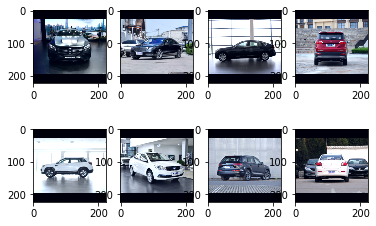

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


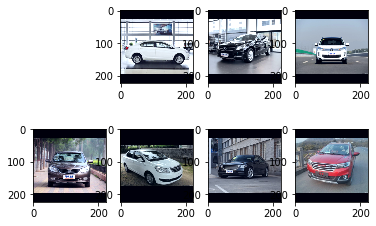

In [132]:
i=0#打印几张训练集样本
for image_batch in next(iter(trainloader)):#
        #print(image_batch[index].shape)
        #print(label.shape,index,image_batch.shape)
        for j in range(batch_size):
                if image_batch[j][0].shape:
                    img = np.moveaxis((image_batch[j].numpy()+2)/4,0,2)
                    i+=1
                    #print(i)
                    plt.subplot(2,4,(i%8+1))
                    plt.imshow(img)
                    if i%8==0 and i!=0:
                        plt.show()
            


In [115]:
#define the network below,resnet 152
####################################
#######################################
###########################################
import torch
import torch.nn as nn
from torch.hub import load_state_dict_from_url 


__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152', 'resnext50_32x4d', 'resnext101_32x8d',
           'wide_resnet50_2', 'wide_resnet101_2']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
    'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
    'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
    'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
    'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
}


def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1
    __constants__ = ['downsample']

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4
    __constants__ = ['downsample']

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,
                 groups=1, width_per_group=64, replace_stride_with_dilation=None,
                 norm_layer=None):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    # Allow for accessing forward method in a inherited class
    forward = _forward


def _resnet(arch, block, layers, pretrained, progress, **kwargs):
    model = ResNet(block, layers, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls[arch],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model





def resnet152(pretrained=True, progress=True, **kwargs):
    r"""ResNet-152 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet152', Bottleneck, [3, 8, 36, 3], pretrained, progress,
                   **kwargs)





In [116]:
import torch.optim as optim
model = resnet152(pretrained=True)

fc_features = model.fc.in_features

model.fc = nn.Linear(fc_features, 210)

#criterion = FocalLoss()
criterion_class= nn.CrossEntropyLoss() 
criterion_hinge=nn.MultiMarginLoss()#hinge loss和交叉熵loss 共用

learning_rate = 1e-4
print(model)
model=model.to(device)
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

#model, optimizer = amp.initialize(model, optimizer, opt_level="O1") # 这里是“欧一”，不是“零一”



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

)


In [117]:
from tqdm import tqdm
def train_epoch(model, train_loader, criterion1,criterion2, optimizer):
    model.train()
    model.to(device)

    running_loss = 0.0
    total_predictions = 0.0
    correct_predictions = 0.0
    
    start_time = time.time()
    for data, target in tqdm(train_loader):  
        #print(target)
        optimizer.zero_grad()   
        data = data.to(device)
        target = target.long().to(device)
        target=target.squeeze(1)#############
        outputs = model(data)
        loss = criterion1(outputs, target)####################
        loss+=criterion2(outputs, target)
        #print(loss)
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += target.size(0)
        correct_predictions += (predicted == target).sum().item()
        acc = (correct_predictions/total_predictions)*100.0
        #with amp.scale_loss(loss, optimizer) as scaled_loss:
            #scaled_loss.backward()
        loss.backward()
        optimizer.step()

    end_time = time.time()
    
    running_loss /= len(train_loader)
    print('Training Loss: ', running_loss, 'Time: ',end_time - start_time,' train accuracy',acc)
    return running_loss,acc

In [118]:
def test_model(model, test_loader, criterion1,criterion2):
    with torch.no_grad():
        model.eval()
        model.to(device)

        running_loss = 0.0
        total_predictions = 0.0
        correct_predictions = 0.0
        Predicted=[]
        for data, target in tqdm(test_loader): 
            #print(data.shape,target.shape)
            data = data.to(device) 
            target = target.long().to(device)
            target=target.squeeze(1)##################
            outputs = model(data)

            _, predicted = torch.max(outputs.data, 1)
            Predicted.append(predicted)
            #print('target',target,'prediction',predicted)
            total_predictions += target.size(0)
            correct_predictions += (predicted == target).sum().item()

            loss = criterion1(outputs, target)####################
            loss+=criterion2(outputs, target)
            running_loss += loss.item()


        running_loss /= len(test_loader)
        acc = (correct_predictions/total_predictions)*100.0
        print('Testing Loss: ', running_loss)
        print('Testing Accuracy: ', acc, '%')
        
        return running_loss, acc
    

In [119]:
found=0
max='0parameter.pkl'
for item in os.listdir('C:/Users/zhaoh/Downloads/car recognition resnet/'):
    
    if 'parameter.pkl' in item:
        found=1
        if item>max:
            max=item
if found==1:
    print('pretrained found, will be loaded',max)
    model.load_state_dict(torch.load('C:/Users/zhaoh/Downloads/car recognition resnet/'+max))
else:
    print('start from zero')#这个模块能load最新的训练weight

pretrained found, will be loaded 5parameter.pkl


In [133]:
n_epochs = 5
Train_loss = []
Test_loss = []
Test_acc = []
Val_loss = []
Val_acc = []
Train_acc=[]
for i in range(n_epochs):
    #val_loss, val_acc = test_model(model, valloader, criterion_class, criterion_hinge)#############################
    train_loss,train_acc = train_epoch(model, trainloader, criterion_class, criterion_hinge,optimizer)
    #test_loss, test_acc = test_model(model, testloader, criterion_class, criterion_hinge) 
    Train_acc.append(train_acc)
    Train_loss.append(train_loss)
    if (i%4==0 and i!=0)and optimizer.param_groups[0]["lr"]>5e-6:
        optimizer.param_groups[0]["lr"]=optimizer.param_groups[0]["lr"]/2
        print('learning rate reduced to ',optimizer.param_groups[0]["lr"])
    torch.save(model.state_dict(), '/data/Vehicle-1M/new/Vehicle-1M/'+str(i)+'parameter.pkl')
    val_loss, val_acc = test_model(model, valloader, criterion_class, criterion_hinge)
    Val_acc.append(val_acc)
    Val_loss.append(val_loss)
    #Test_loss.append(test_loss)
    #Test_acc.append(test_acc)
    print('epoch ',i,' =='*20)
#torch.save(model.state_dict(), '/data/Vehicle-1M/new/Vehicle-1M/'+'last'+'parameter.pkl')
#test_loss, test_acc = test_model(model, testloader, criterion)

  1%|█                                                                                 | 6/440 [00:08<10:26,  1.44s/it]

KeyboardInterrupt: 

In [60]:
def final_test_model(model, test_loader, criterion1,criterion2):
    with torch.no_grad():
        model.eval()
        model.to(device)

        #running_loss = 0.0
        total_predictions = 0.0
        correct_predictions = 0.0
        Predicted=[]
        for data, target in test_loader: 
            #print(data.shape,target.shape)
            data = data.to(device) 
            target = target.long().to(device)
            target=target.squeeze(1)##################
            outputs = model(data)

            _, predicted = torch.max(outputs.data, 1)
            Predicted.append(predicted)
            #print('target',target,'prediction',predicted)
            total_predictions += target.size(0)
            correct_predictions += (predicted == target).sum().item()
            data = data.cpu()
            target = target.cpu()
            #print(len(target))
            #predict_list=[]
            #actual_list=[]
            for k in range(len(target)):
                img = np.moveaxis((data[k].numpy()+2)/4,0,2)
                #print(img.shape)
                #plt.subplot(2,4,(k%8+1))
                plt.imshow(img)
                plt.show()
                print('predicted',label2name[int(predicted[k])],'target',label2name[int(target[k])])
                #print(k)
                #predict_list.append()
                #if (k%8==0 and k!=0)or k==len(j)-1:
                    #plt.show()
                #print(predicted[i].dtype,target[i].dtype)
                
            #print('predicted' ,predicted)
            #print('actual' ,target)
                    
            
                    
            #loss = criterion1(outputs, target)####################
            #loss+=criterion2(outputs, target)
            #running_loss += loss.item()


        #running_loss /= len(test_loader)
        acc = (correct_predictions/total_predictions)*100.0
        #print('Testing Loss: ', running_loss)
        print('Testing Accuracy: ', acc, '%')
        
        return acc

In [118]:
#新的transform，能不畸变图片
class ratio_crop(object):
    def __init__(self, ratio=1.05):
        self.ratio = ratio
    def __call__(self, images):
            ratio=1.05
            #for img in images:
            w=images.shape[1]
            h=images.shape[0]
            aspect_ratio=float(w)/float(h)
            #print(images.shape,aspect_ratio)
            if aspect_ratio>ratio:
                dif = np.abs(w  - h)
                pad1, pad2 = int(dif // 2), int(dif - dif // 2)
                pad = ((pad1, pad2), (0, 0), (0, 0))
                images = np.pad(images, pad, "constant", constant_values=0)
                #input_img = cv2.resize(input_x, (inputwidth, inputheight))
            else:
                # padding w
                dif = np.abs(h  - w)
                pad1, pad2 = int(dif // 2), int(dif - dif // 2)
                pad = ((0, 0), (pad1, pad2), (0, 0))
                images = np.pad(images, pad, "constant", constant_values=0)
                #input_img = cv2.resize(input_x, (inputwidth, inputheight))
            return images

In [119]:
transform1 = transforms.Compose([
            ratio_crop(1.05),
            transforms.ToPILImage(),
            transforms.Resize((224,224), interpolation=2),  
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
]) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


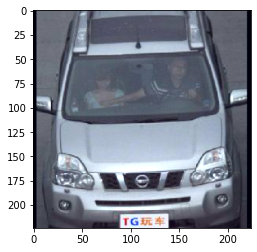

predicted 起亚狮跑 2009 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


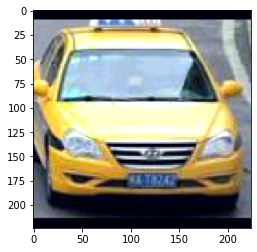

predicted 长安星光4500 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


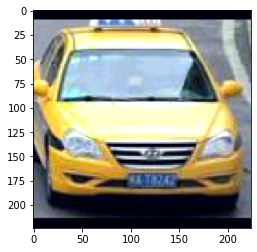

predicted 长安星光4500 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


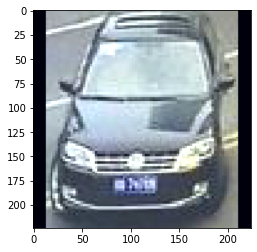

predicted 东风 菱智 M5 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


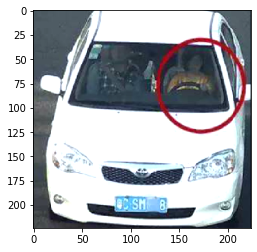

predicted 马自达CX5 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


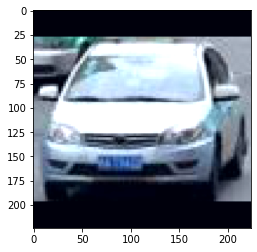

predicted 长安V5 2011 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


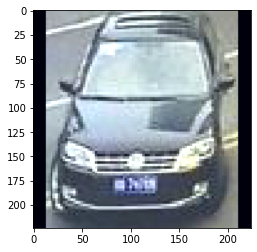

predicted 东风 菱智 M5 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


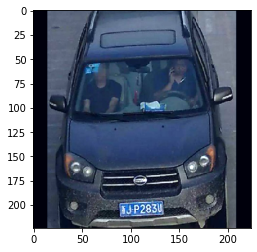

predicted 现代途胜 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


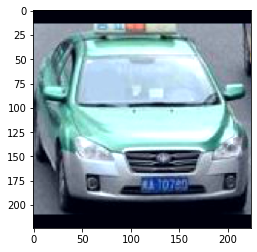

predicted 雪佛兰乐风 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


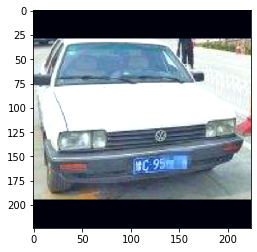

predicted 大众桑塔纳经典 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


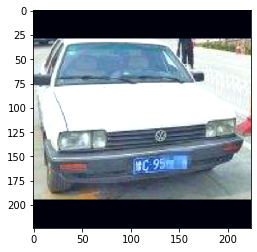

predicted 大众桑塔纳经典 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


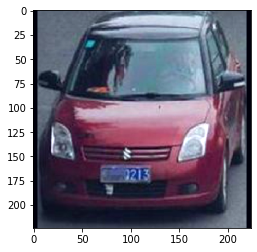

predicted 长安星光4500 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


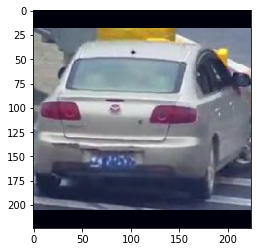

predicted 大众捷达2010 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


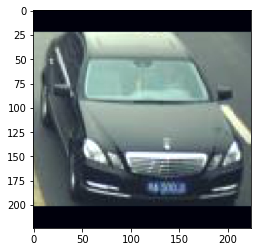

predicted 奔驰S级 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


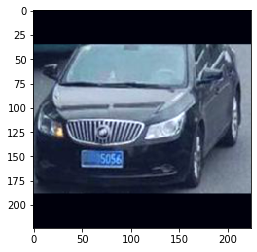

predicted 长安V5 2013 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


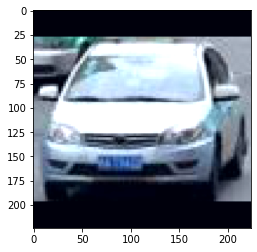

predicted 长安V5 2011 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


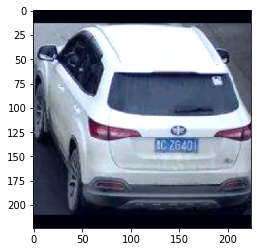

predicted 长安之星2 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


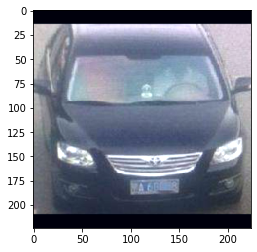

predicted 大众帕萨特领驭2009 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


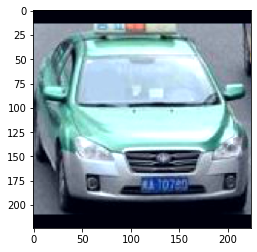

predicted 雪佛兰乐风 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


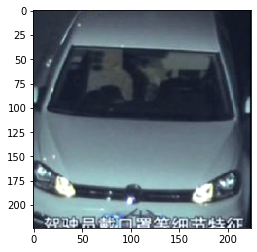

predicted 大众速腾2012 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


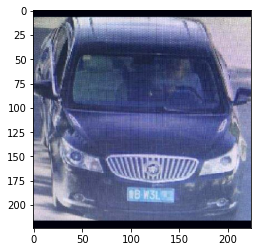

predicted 别克 君越2009 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


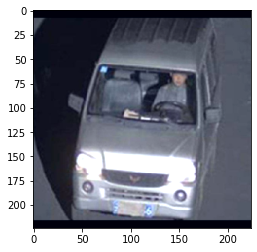

predicted 福特全顺 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


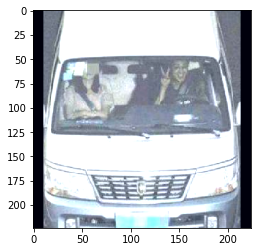

predicted 金杯海狮 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


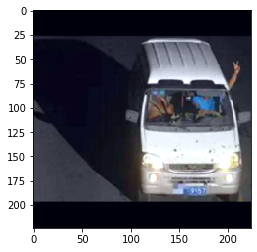

predicted 五菱荣光 小卡 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


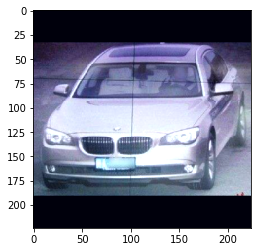

predicted 长安V5 2011 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


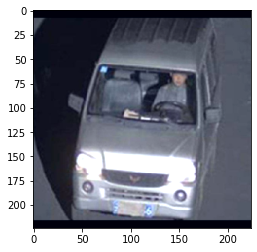

predicted 福特全顺 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


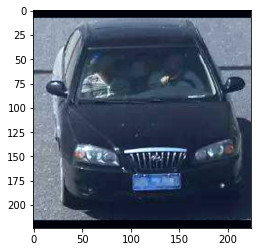

predicted 长安V5 2011 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


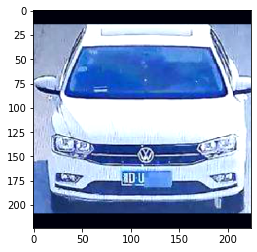

predicted 大众捷达2010 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


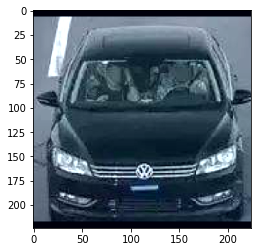

predicted 大众捷达2013 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


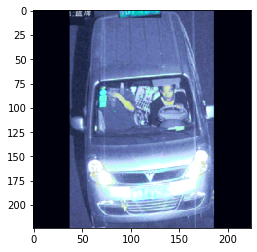

predicted 金杯海狮 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


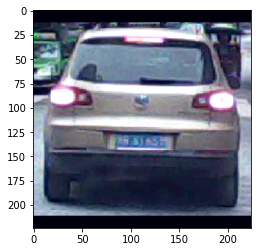

predicted 大众桑塔纳经典 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


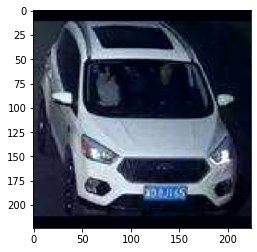

predicted 雪佛兰乐风 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


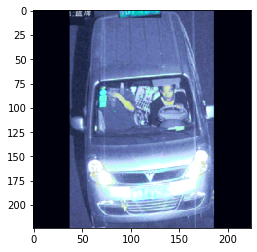

predicted 金杯海狮 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


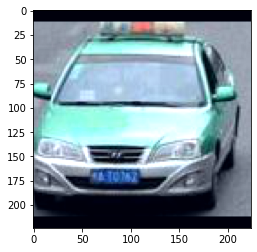

predicted 东风小康 厢式车 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


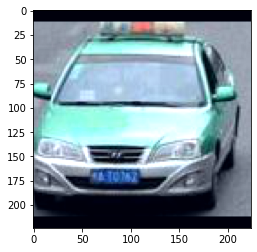

predicted 东风小康 厢式车 target 保时捷 卡宴


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


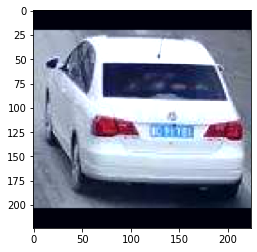

predicted 大众捷达2013 target 保时捷 卡宴
Testing Accuracy:  0.0 %


In [120]:
test_path="C:/Users/zhaoh/Downloads/PyTorch-YOLOv3-master/PyTorch-YOLOv3-master/output/"
test_set = DrivingDataset(data_dir=test_path, is_train=True,transform=transform1) 
testloader = torch.utils.data.DataLoader(test_set, batch_size=8,
                                          shuffle=True, num_workers=n_workers)
       
val_acc = final_test_model(model, testloader, criterion_class, criterion_hinge)


In [ ]:
#torch.save(model.state_dict(), 'C:/Users/zhaoh/Downloads/car recognition resnet/car-recognition/'+str(0)+'parameter.pkl')